1. Scrape the Location Counts

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from bs4 import BeautifulSoup
import re

# Set the path to HTML file in drive and read file
file_path = "/content/drive/My Drive/Starbucks Coffee Locations Near Me + Reviews & Menu.html"

with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

soup = BeautifulSoup(content, 'html.parser')

# Fetch all <a> tags inside <li> tags
links = soup.select("li > a")

# Extract state and number of stores
state_stores = {}
pattern = r'(.+?) Starbucks Coffee locations (\(\d+\))'

for link in links:
    match = re.match(pattern, link.text)
    if match:
        state_name = match.group(1)
        store_count = int(match.group(2).replace("(", "").replace(")", ""))
        state_stores[state_name] = store_count

print(state_stores)


{'Alaska': 24, 'Alabama': 73, 'Arkansas': 33, 'Arizona': 279, 'California': 2362, 'Colorado': 371, 'Connecticut': 107, 'District of Columbia': 72, 'Delaware': 20, 'Florida': 616, 'Georgia': 248, 'Hawaii': 72, 'Iowa': 49, 'Idaho': 57, 'Illinois': 455, 'Indiana': 193, 'Kansas': 65, 'Kentucky': 69, 'Louisiana': 76, 'Massachusetts': 208, 'Maryland': 212, 'Maine': 22, 'Michigan': 196, 'Minnesota': 140, 'Missouri': 118, 'Mississippi': 23, 'Montana': 17, 'North Carolina': 181, 'North Dakota': 15, 'Nebraska': 30, 'New Hampshire': 22, 'New Jersey': 154, 'New Mexico': 56, 'Nevada': 188, 'New York': 492, 'Ohio': 266, 'Oklahoma': 62, 'Oregon': 279, 'Pennsylvania': 279, 'Rhode Island': 21, 'South Carolina': 65, 'South Dakota': 14, 'Tennessee': 126, 'Texas': 720, 'Utah': 59, 'Virginia': 300, 'Vermont': 6, 'Washington': 634, 'Wisconsin': 119, 'West Virginia': 13, 'Wyoming': 16, 'County Dublin': 1, 'England': 1, 'Greater London': 3, 'Surrey': 1, 'Madrid': 1, 'British Columbia': 1, 'Ontario': 1}


2. Write a function stateabb() that takes a state name (assume it’s spelled correctly) and converts it to its state abbreviation. This can be a very simple function.

In [5]:
def stateabb(state_name):
    state_abbs = {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
        'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii':
        'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
        'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
        'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
        'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
        'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
        'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
        'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
    }

    return state_abbs.get(state_name, "Unknown State")


In [6]:
print(stateabb("California"))

CA


In [7]:
print(stateabb("British Columbia"))

Unknown State


3. Parse, merge and tidy your data so that you have a row for each state and two columns: state abbrevation, location count.



In [8]:
import pandas as pd

li_elements = soup.find_all('li')

# Extracting state names and location counts
data = []
for li in li_elements:
    if '(' in li.text and ')' in li.text:
        state_name = " ".join(li.text.split()[:-4])
        count = int(li.text.split('(')[-1].split(')')[0])
        state_abbreviation = stateabb(state_name)
        data.append([state_name, state_abbreviation, count])


# Convert data to a DataFrame
state_data = pd.DataFrame(data, columns=['state', 'state abbreviation', 'location count'])

print(state_data)

                   state state abbreviation  location count
0                 Alaska                 AK              24
1                Alabama                 AL              73
2               Arkansas                 AR              33
3                Arizona                 AZ             279
4             California                 CA            2362
5               Colorado                 CO             371
6            Connecticut                 CT             107
7   District of Columbia                 DC              72
8               Delaware                 DE              20
9                Florida                 FL             616
10               Georgia                 GA             248
11                Hawaii                 HI              72
12                  Iowa                 IA              49
13                 Idaho                 ID              57
14              Illinois                 IL             455
15               Indiana                

In [9]:
# Only include US states
state_data = state_data[state_data['state abbreviation'] != 'Unknown State']

In [10]:
state_data

,state,state abbreviation,location count
0,Alaska,AK,24
1,Alabama,AL,73
2,Arkansas,AR,33
3,Arizona,AZ,279
4,California,CA,2362
5,Colorado,CO,371
6,Connecticut,CT,107
7,District of Columbia,DC,72
8,Delaware,DE,20
9,Florida,FL,616


4. Scrape the state names and populations from this wikipedia page. Convert the state names to abbreviations and merge these data with your coffee dataset.

In [11]:
import requests
from bs4 import BeautifulSoup

URL = "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find('table')

# Extract state names and population
states = []
populations = []
rows = table.find_all('tr')
for row in rows[1:]:
    columns = row.find_all('td')
    state_name = columns[2].text.strip()
    population = columns[3].text.strip().replace(',', '')
    states.append(state_name)
    populations.append(int(population))

In [12]:
data = []
for state in states:
    abbreviation = stateabb(state)
    data.append([abbreviation])

# Convert data to a DataFrame
state_pop = pd.DataFrame(data, columns=['state abbreviation'])
state_pop['population'] = populations
state_pop = state_pop[state_pop['state abbreviation'] != 'Unknown State']
state_pop


,state abbreviation,population
0,CA,39538223
1,TX,29145505
2,FL,21538187
3,NY,20201249
4,PA,13002700
5,IL,12812508
6,OH,11799448
7,GA,10711908
8,NC,10439388
9,MI,10077331


In [13]:
# Merge datasets
statedata = pd.merge(state_data, state_pop, on='state abbreviation', how='inner')
statedata.head()

,state,state abbreviation,location count,population
0,Alaska,AK,24,733391
1,Alabama,AL,73,5024279
2,Arkansas,AR,33,3011524
3,Arizona,AZ,279,7151502
4,California,CA,2362,39538223


5. Find the revenue, stock price, or your financial metric of choice for each of the companies listed above (if you can find a website to scrape these from that’s great!…but it’s okay if you manually enter these into R). Merge these values into your big dataset. Note: these values may be repeated for each state.

Since I could only scrape data on Starbucks on menuism, I opened the CSV with all of the scraped data for each company shared to discord on excel and added data for '2022 revenue' for all of the companies listed.

In [14]:
# Load new data
file_path2 = "/content/drive/My Drive/df_lab4_scraped.csv"
full_data = pd.read_csv(file_path2)
full_data

,State,Coffee Chain,State Abbreviation,Location Count,Population,2022 revenue
0,Alaska,Starbucks,AK,24,733391,26580000000
1,Alabama,Starbucks,AL,73,5024279,26580000000
2,Arkansas,Starbucks,AR,33,3011524,26580000000
3,Arizona,Starbucks,AZ,279,7151502,26580000000
4,California,Starbucks,CA,2362,39538223,26580000000
...,...,...,...,...,...,...
264,Vermont,McDonald's,VT,30,643077,23180000000
265,Washington,McDonald's,WA,326,7705281,23180000000
266,Wisconsin,McDonald's,WI,353,5893718,23180000000
267,West Virginia,McDonald's,WV,107,1793716,23180000000


6. Create a region variable in your dataset according to the scheme on this wikipedia page: Northeast, Midwest, South, West. You do not need to scrape this information.

In [16]:
# Create dictionary of states mapped by region
regions = {
    'Connecticut': 'Northeast',
    'Maine': 'Northeast',
    'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast',
    'Rhode Island': 'Northeast',
    'Vermont': 'Northeast',
    'New Jersey': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Michigan': 'Midwest',
    'Ohio': 'Midwest',
    'Wisconsin': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Missouri': 'Midwest',
    'Nebraska': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Delaware': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Maryland': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Virginia': 'South',
    'District of Columbia': 'South',
    'West Virginia': 'South',
    'Alabama': 'South',
    'Kentucky': 'South',
    'Mississippi': 'South',
    'Tennessee': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    'Arizona': 'West',
    'Colorado': 'West',
    'Idaho': 'West',
    'Montana': 'West',
    'Nevada': 'West',
    'New Mexico': 'West',
    'Utah': 'West',
    'Wyoming': 'West',
    'Alaska': 'West',
    'California': 'West',
    'Hawaii': 'West',
    'Oregon': 'West',
    'Washington': 'West'
}

# Create new column to map states to regions
full_data['region'] = full_data['State'].map(regions)
full_data.head()

,State,Coffee Chain,State Abbreviation,Location Count,Population,2022 revenue,region
0,Alaska,Starbucks,AK,24,733391,26580000000,West
1,Alabama,Starbucks,AL,73,5024279,26580000000,South
2,Arkansas,Starbucks,AR,33,3011524,26580000000,South
3,Arizona,Starbucks,AZ,279,7151502,26580000000,West
4,California,Starbucks,CA,2362,39538223,26580000000,West


7. Assess and comment on the prevalence of each chain.

Are some of these chains more prevalent in certain states than others? Possibly despite having less stores overall? Same questions for regions instead of states.

In [17]:
# Find top 10 states by store count for all companies
top_10 = full_data.sort_values(by='Location Count', ascending=False).head(10)
top_10

,State,Coffee Chain,State Abbreviation,Location Count,Population,2022 revenue,region
4,California,Starbucks,CA,2362,39538223,26580000000,West
222,California,McDonald's,CA,1623,39538223,23180000000,West
261,Texas,McDonald's,TX,1303,29145505,23180000000,South
227,Florida,McDonald's,FL,1142,21538187,23180000000,South
68,Massachusetts,Dunkin' Donuts,MA,1101,7029917,1400000000,Northeast
81,New York,Dunkin' Donuts,NY,1022,20201249,1400000000,Northeast
253,Ohio,McDonald's,OH,843,11799448,23180000000,Midwest
252,New York,McDonald's,NY,811,20201249,23180000000,Northeast
232,Illinois,McDonald's,IL,791,12812508,23180000000,Midwest
43,Texas,Starbucks,TX,720,29145505,26580000000,South


From this dataset you can see that the most prominent chain by state was Starbucks with 2362 stores in California.  It is interesting that California also has the second most prominent chain by stat with McDonald's having 1623 stores in the state.  It does make sense though, as California has the largest population of any state in the US.

In [18]:
# Create a pivot table
pivot_table = full_data.pivot_table(values='Location Count',
                                    index='region',
                                    columns='Coffee Chain',
                                    aggfunc='sum').reset_index()

pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table

<ipython-input-18-d85fc7d22279>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pivot_table['Total'] = pivot_table.sum(axis=1)


Coffee Chain,region,Au Bon Pain,Caribou Coffee,Dunkin' Donuts,McDonald's,Panera Bread,Peet's Coffee & Tea,Starbucks,The Coffee Bean & Tea Leaf,Tim Horton's,Total
0,Midwest,64.0,520.0,929.0,4280.0,748.0,3.0,1660.0,NaN,309.0,8513.0
1,Northeast,184.0,6.0,3871.0,2447.0,498.0,1.0,1311.0,NaN,179.0,8497.0
2,South,83.0,87.0,1512.0,6643.0,809.0,3.0,2909.0,9.0,12.0,12067.0
3,West,1.0,10.0,169.0,3411.0,323.0,190.0,4414.0,239.0,NaN,8757.0


When comparing the store counts of each chain by region we get some pretty neat insights.  We can see that the most prominent chain by region would be McDonald's in the South with 6643 restuarants.  

Does the distribution of each chain’s stores match population distribution, by both state/region?

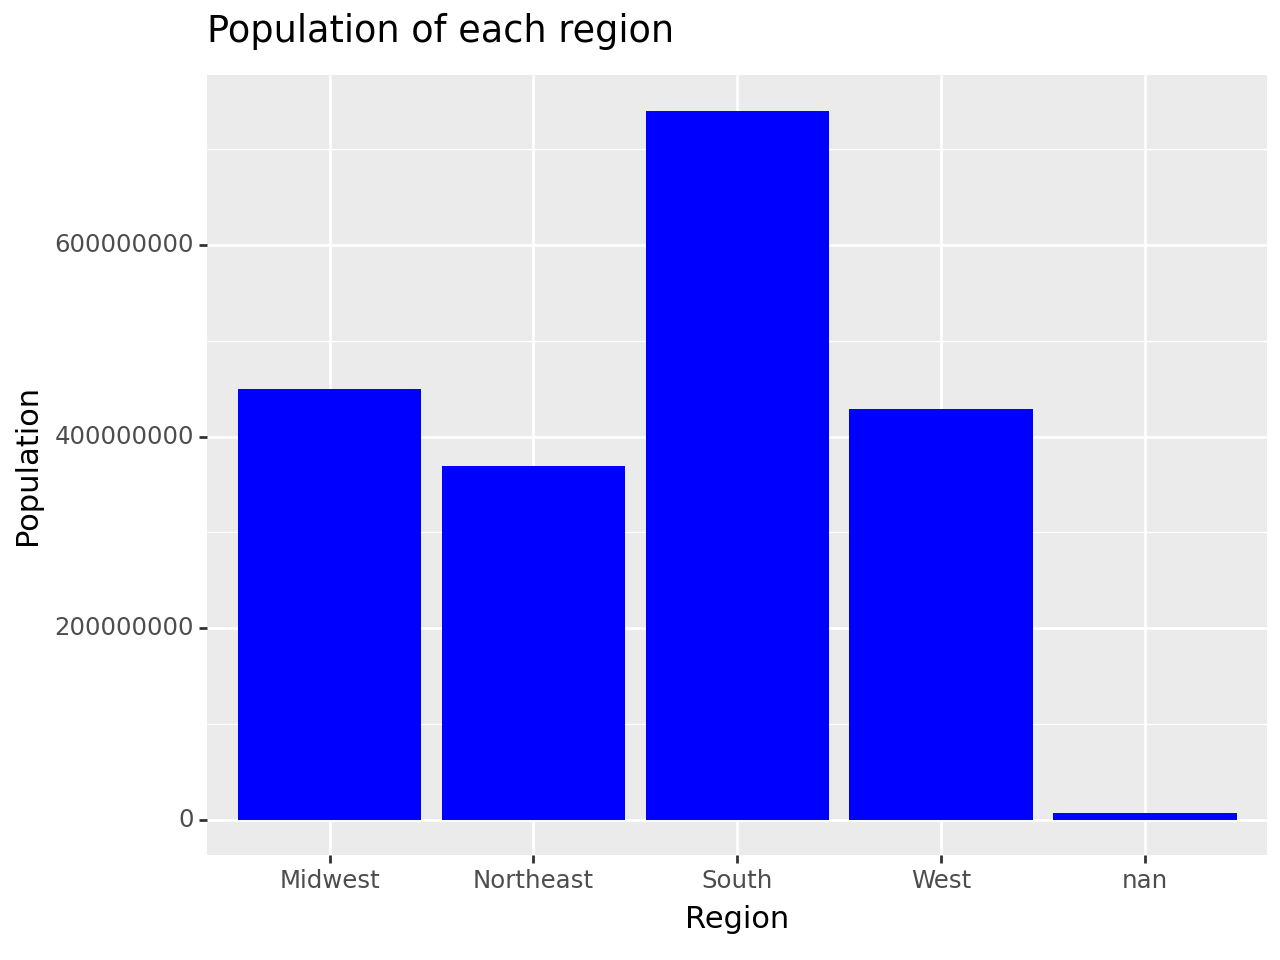

<Figure Size: (640 x 480)>

In [28]:
from plotnine import *

plot = (ggplot(full_data, aes(x='region', y='Population'))
        + geom_bar(stat='identity', fill='blue')
        + labs(title="Population of each region", y="Population", x="Region")
       )
plot

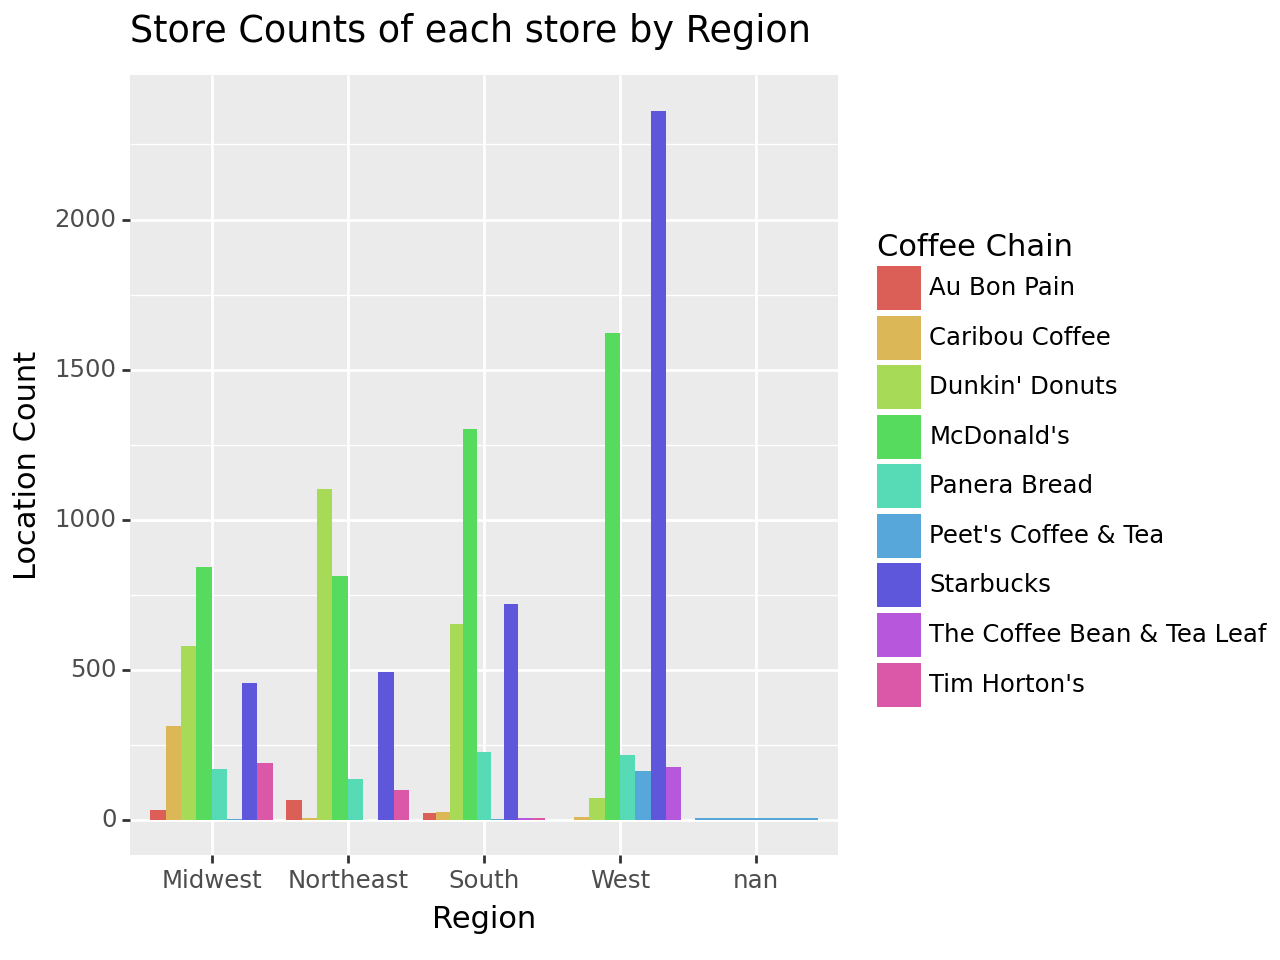

<Figure Size: (640 x 480)>

In [20]:
plot = (ggplot(full_data, aes(x='region', y='Location Count', fill='Coffee Chain'))
        + geom_bar(stat='identity', position='dodge')
        + labs(title="Store Counts of each store by Region", y="Location Count", x="Region")
       )
plot

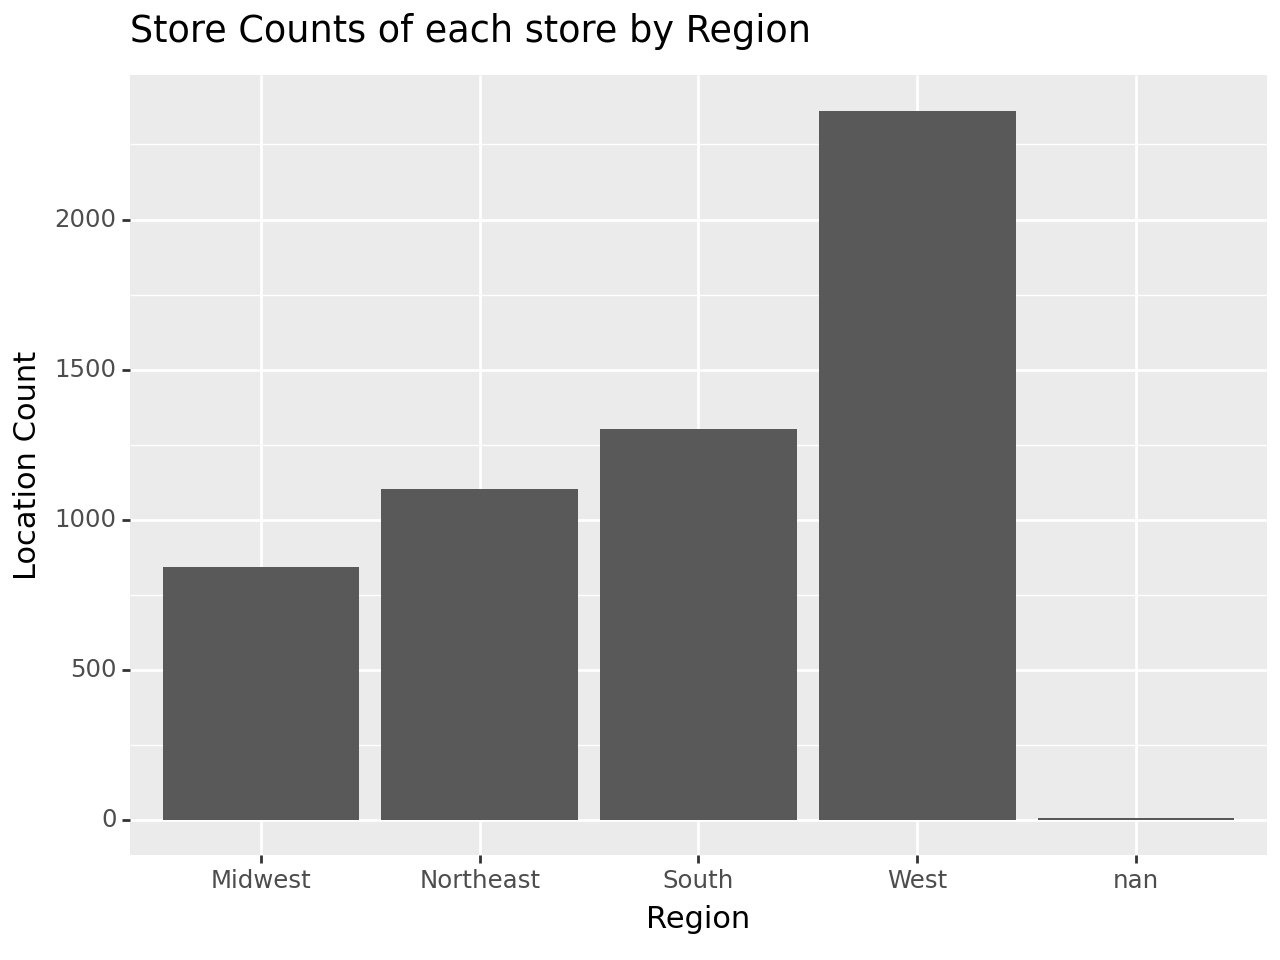

<Figure Size: (640 x 480)>

In [21]:
plot = (ggplot(full_data, aes(x='region', y='Location Count'))
        + geom_bar(stat='identity', position='dodge')
        + labs(title="Store Counts of each store by Region", y="Location Count", x="Region")
       )
plot

The distribution of each chain's stores do not match the poplulation distribution by region.  Despite the West having the third highest population count of the 4 regions, it boasts almost double the amount of stores than the next highest store count by state.  This is likely due to the incredibly high frequency of McDonald's and Starbucks stores in the West, as illustrated in the above graph.

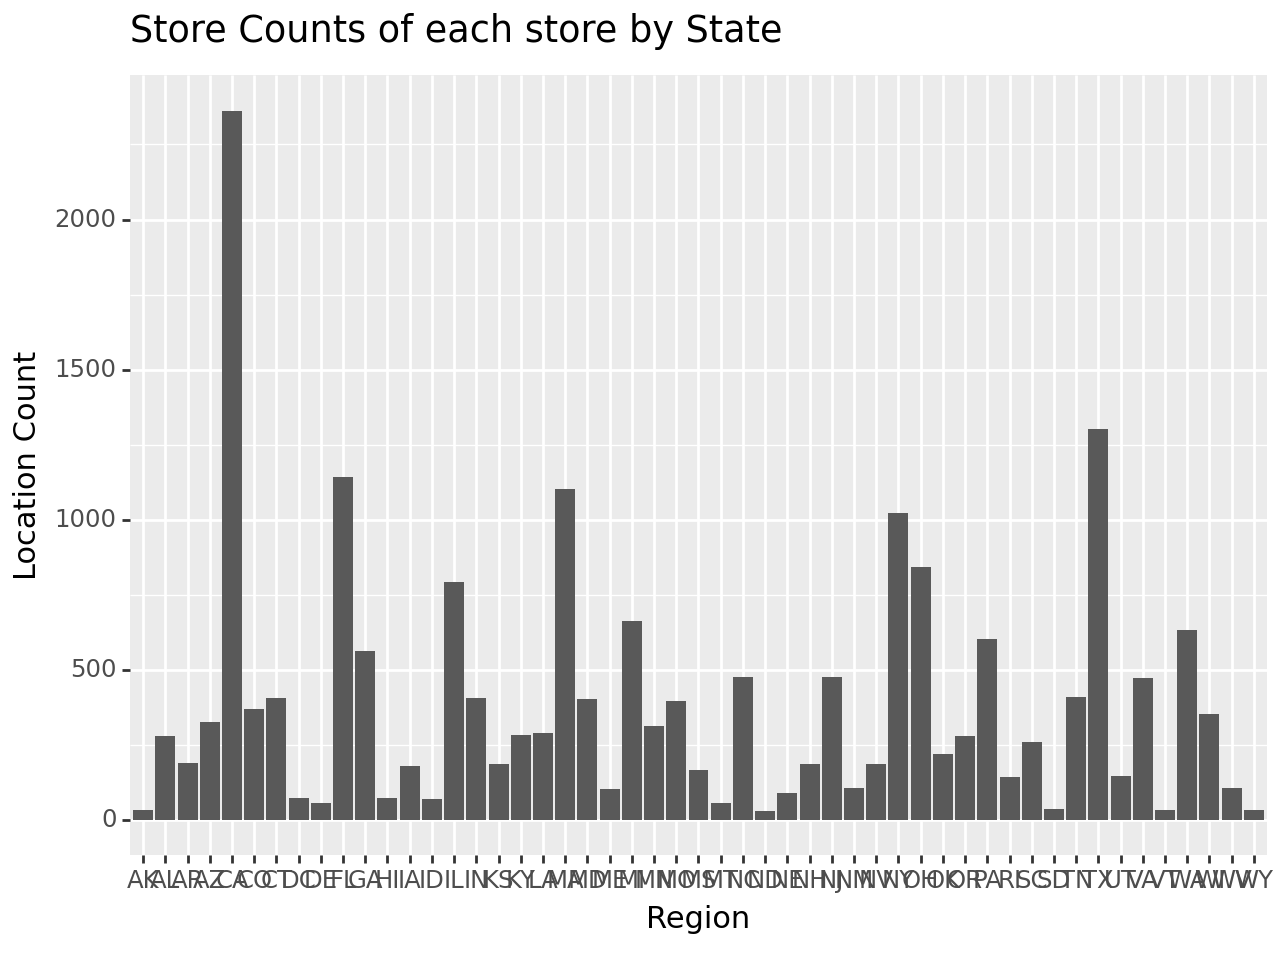

<Figure Size: (640 x 480)>

In [22]:
plot = (ggplot(full_data, aes(x='State Abbreviation', y='Location Count'))
        + geom_bar(stat='identity', position='dodge')
        + labs(title="Store Counts of each store by State", y="Location Count", x="Region")
       )
plot

Do the financial data match what you’d expect based on the number and locations of the stores? Why or why not?

In [36]:
revenue_data = full_data.groupby('State').agg({
    '2022 revenue': 'mean',
    'Location Count': 'sum'
}).reset_index()

# Renaming the columns for clarity
revenue_data.columns = ['State', 'Average 2022 Revenue', 'Total Location Count']
revenue_data = revenue_data.sort_values(by='Total Location Count', ascending=False)

revenue_data

,State,Average 2022 Revenue,Total Location Count
4,California,9.573833e+09,4585
9,Florida,9.416833e+09,2663
33,New York,9.771833e+09,2621
44,Texas,8.212000e+09,2250
13,Illinois,8.178000e+09,2095
22,Massachusetts,9.771833e+09,1764
36,Ohio,8.413286e+09,1556
39,Pennsylvania,7.484500e+09,1440
23,Michigan,8.413286e+09,1284
31,New Jersey,9.771833e+09,1076


In [37]:
revenue_sort = revenue_data.sort_values(by='Average 2022 Revenue', ascending=False)
revenue_sort

,State,Average 2022 Revenue,Total Location Count
51,Wyoming,2.488000e+10,50
1,Alaska,2.488000e+10,57
27,Montana,2.488000e+10,75
12,Idaho,1.818667e+10,135
45,Utah,1.705333e+10,211
0,Alabama,1.399000e+10,373
43,Tennessee,1.399000e+10,632
32,New Mexico,1.399000e+10,174
3,Arkansas,1.399000e+10,247
18,Louisiana,1.399000e+10,373


From the finincial data I got from the internet, you cannot draw any real conclusions about the relationship between the finincial data and the population of each state because the finincial data was not state-specific.  

8. Convert your code for Exercises 1-3 above to a function that takes a single argument: the menuism URL. This function should

*   Scrape the information on state names and corresponding number of store locations on the webpage specified
*   Extract the name of the company from either the URL specified or the webpage
*   Return a clean, organized dataset that has three columns: state abbreviation, location count, company name. Company name will likely be repeated on every row.

In [45]:
def scrape_menuism(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    company_name = soup.title.string.split(' Locations')[0]

    rows = soup.find_all('tr')[1:]
    state_names = []
    location_counts = []
    company_names = []

    for row in rows:
        cols = row.find_all('td')
        state_name = cols[0].text
        location_count = int(cols[1].text.replace(',', ''))
        state_names.append(state_name)
        location_counts.append(location_count)
        company_names.append(company_name)

    state__data = pd.DataFrame({
        'State': state_names,
        'Coffee Chain': company_names,
        'Location Count': location_counts
    })

    state__data['State Abbreviation'] = state__data['State'].map(stateabb)
    state__data = state__data[['State', 'Coffee Chain', 'State Abbreviation', 'Location Count']]

    return state__data

In [48]:
# Example (does not work because cannot access site):
url = "https://www.menuism.com/restaurant-locations/starbucks-coffee-39564"
state_scrape = scrape_menuism(url)
state_scrape

,State,Coffee Chain,State Abbreviation,Location Count
